****


## **Chinelo Osuji**
**Broward College**

[LinkedIn](https://linkedin.com/in/chineloosuji/)

****

****


# **We Also Include Gas Prices per Therm and Electricity Prices per kWh in South Florida**


****

****

**Average Price: Utility (Piped) Gas per Therm in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72620.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72620

****

In [ ]:
file_path2 = 'APUS35B72620.csv'
gas = pd.read_csv(file_path2,index_col='DATE', parse_dates=True)
gas.index.freq = 'MS'

In [ ]:
gas

,APUS35B72620
DATE,
1978-11-01,0.617
1978-12-01,0.647
1979-01-01,0.650
1979-02-01,0.650
1979-03-01,0.650
...,...
2023-09-01,3.080
2023-10-01,3.087
2023-11-01,3.055


In [ ]:
gas.rename(columns={'APUS35B72620': 'GAS'}, inplace=True)

In [ ]:
gas.dtypes

GAS    object
dtype: object

In [ ]:
gas['GAS'] = pd.to_numeric(gas['GAS'], errors='coerce')

In [ ]:
gas[gas.isnull().any(axis=1)]

,GAS
DATE,
1985-09-01,NaN
2012-10-01,NaN
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,NaN
2018-05-01,NaN
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN


In [ ]:
gas.interpolate(method='time', inplace=True)

In [ ]:
gas.isnull().sum()

GAS    0
dtype: int64

****

**Average Price: Electricity per Kilowatt-Hour in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72610.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72610


****

In [ ]:
file_path = 'APUS35B72610.csv'
electricity = pd.read_csv(file_path,index_col='DATE', parse_dates=True)
electricity.index.freq = 'MS'

In [ ]:
electricity

,APUS35B72610
DATE,
1978-11-01,0.046
1978-12-01,0.043
1979-01-01,0.043
1979-02-01,0.045
1979-03-01,0.047
...,...
2023-09-01,0.158
2023-10-01,0.158
2023-11-01,0.158


In [ ]:
electricity.rename(columns={'APUS35B72610': 'ELECTRICITY'}, inplace=True)

In [ ]:
electricity.dtypes

ELECTRICITY    object
dtype: object

In [ ]:
electricity['ELECTRICITY'] = pd.to_numeric(electricity['ELECTRICITY'], errors='coerce')

In [ ]:
electricity[electricity.isnull().any(axis=1)]

,ELECTRICITY
DATE,
1985-09-01,NaN
2019-09-01,NaN


In [ ]:
electricity.interpolate(method='time', inplace=True)

In [ ]:
electricity.isnull().sum()

ELECTRICITY    0
dtype: int64

In [ ]:
merged_data = pd.merge(gas, merged_data, left_index=True, right_index=True, how='left')

merged_data = pd.merge(electricity, merged_data, left_index=True, right_index=True, how='left')

merged_data['scaled_gas_price'] = merged_data['GAS'] * 100
merged_data['scaled_electricity_price'] = merged_data['ELECTRICITY'] * 1000

merged_data['diff_gas_price'] = diff(merged_data['scaled_gas_price'],k_diff=1).fillna(0)
merged_data['diff_electricity_price'] = diff(merged_data['scaled_electricity_price'],k_diff=1).fillna(0)

for i in range(1, 7):
    merged_data[f'diff_gas_price_lag_{i}'] = merged_data['diff_gas_price'].shift(i)
    merged_data[f'diff_electricity_price_lag_{i}'] = merged_data['diff_electricity_price'].shift(i)

merged_data['seasonal_diff_gas_lag_12'] = merged_data['diff_gas_price'].shift(12)
merged_data['seasonal_diff_elec_lag_12'] = merged_data['diff_electricity_price'].shift(12)

In [ ]:
for i in range(1, 13):
    merged_data[f'CPI_DIFF_lag_{i}'] = merged_data['CPI_DIFF_1'].shift(i)

for i in range(1, 4):
    merged_data[f'economic2_lag_{i}'] = merged_data['economic2'].shift(i)
    merged_data[f'hurricane_lag_{i}'] = merged_data['hurricane'].shift(i)
    merged_data[f'economic_lag_{i}'] = merged_data['economic'].shift(i)

merged_data['seasonal_diff_lag_12'] = merged_data['CPI_DIFF_1'].shift(12)

merged_data.dropna(inplace=True)

merged_data.loc['2009-11-01':'2016-03-01']

,ELECTRICITY,GAS,economic2,economic_decrease_event,economic,economic_increase_event,hurricane,hurricane_name,Consumer_Price_Index,CPI_DIFF_1,...,economic2_lag_1,hurricane_lag_1,economic_lag_1,economic2_lag_2,hurricane_lag_2,economic_lag_2,economic2_lag_3,hurricane_lag_3,economic_lag_3,seasonal_diff_lag_12
DATE,,,,,,,,,,,,,,,,,,,,,
2009-11-01,0.131,1.536,1,[FPL Average Bill Decrease],0,[],0,[],165.256,3.562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088
2009-12-01,0.131,1.545,1,[FPL Average Bill Decrease],0,[],0,[],165.274,0.018,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2010-01-01,0.115,1.663,1,[FPL Average Bill Decrease],0,[],0,[],145.716,-19.558,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.597
2010-02-01,0.115,1.672,1,[FPL Average Bill Decrease],0,[],0,[],145.741,0.025,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.217
2010-03-01,0.113,1.672,0,[],0,[],0,[],143.656,-2.085,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-01,0.116,1.519,1,[FPL Average Bill Decrease2],0,[],0,[],145.974,-0.082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.943
2015-12-01,0.116,1.519,1,[FPL Average Bill Decrease2],0,[],0,[],145.976,0.002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.956
2016-01-01,0.112,1.509,1,[FPL Average Bill Decrease2],0,[],0,[],141.702,-4.274,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.948


In [ ]:
!pip install scipy
from scipy.stats import mannwhitneyu, spearmanr, kendalltau

****


# **Mann-Kendall Test**
**Conducted on the Exogenous Variables Vs. CPI to find a monotonic trend over time.**

**A monotonic trend shows if the data consistently increases or decreases.**


$ S = \sum_{i=1}^{n-1} \sum_{j=i+1}^{n} \text{sign}(x_j - x_i) $  
where:  
$S$ is the Mann-Kendall test statistic, a measure used to identify trends in a dataset by comparing the relative magnitudes of sample data points. The statistic $S$ is the sum of sign comparisons between all pairs of data points, providing an indication of the direction and consistency of a trend over time.  
$n$ is the number of data points, representing the total number of observations or measurements in the time series or dataset being analyzed.  
$x_i$ and $x_j$ are the data values at times $i$ and $j$ respectively, with $j$ always being greater than $i$. These values represent specific observations in the dataset, and the test involves comparing each pair of observations to assess the trend.  
$\text{sign}(x_j - x_i)$ is the sign function applied to the difference between the paired data values $x_j$ and $x_i$. This function returns $+1$ if $x_j$ is greater than $x_i$, $-1$ if $x_j$ is less than $x_i$, and $0$ if they are equal. The purpose of the sign function in this context is to determine the direction of the trend (increasing or decreasing) between each pair of data points.



****

In [ ]:
CPI2 = CPI[:merged_data.shape[0]]
mk_test_result = kendalltau(merged_data['GAS'], CPI2['Consumer_Price_Index'])
print(f"Mann-Kendall Test statistic: {mk_test_result.statistic}, p-value: {mk_test_result.pvalue}")

Mann-Kendall Test statistic: 0.4082402195544545, p-value: 1.2902129696265167e-44


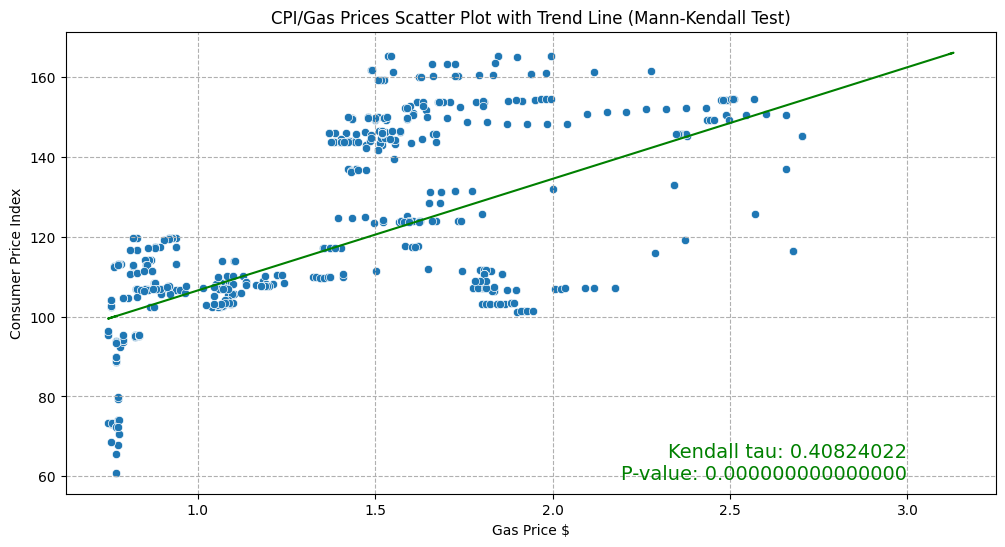

In [ ]:
CPI2 = CPI[:merged_data.shape[0]]
mk_test_result = kendalltau(merged_data['GAS'], CPI2['Consumer_Price_Index'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['GAS'], y=CPI2['Consumer_Price_Index'])
z = np.polyfit(merged_data['GAS'], CPI2['Consumer_Price_Index'], 1)
p = np.poly1d(z)
plt.plot(merged_data['GAS'], p(merged_data['GAS']), "green")
plt.title('CPI/Gas Prices Scatter Plot with Trend Line (Mann-Kendall Test)')
plt.xlabel('Gas Price $')
plt.ylabel('Consumer Price Index')
plt.text(x=3.0, y=min(CPI2['Consumer_Price_Index']) + (max(CPI2['Consumer_Price_Index']) - min(CPI2['Consumer_Price_Index'])) * 0.05,
         s=f"Kendall tau: {mk_test_result.correlation:.8f}\nP-value: {mk_test_result.pvalue:.15f}",
         color='green', fontsize=14, verticalalignment='bottom', horizontalalignment='right')
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
CPI2 = CPI[:merged_data.shape[0]]
mk_test_result = kendalltau(merged_data['ELECTRICITY'], CPI2['Consumer_Price_Index'])
print(f"Mann-Kendall Test statistic: {mk_test_result.statistic}, p-value: {mk_test_result.pvalue}")

Mann-Kendall Test statistic: 0.5675038396018367, p-value: 3.4884507623631903e-82


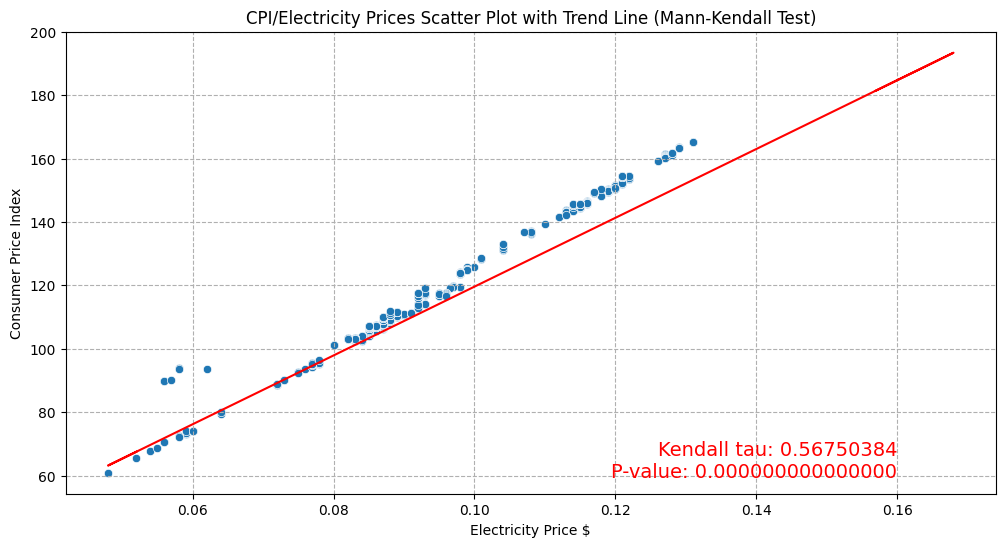

In [ ]:
CPI2 = CPI[:merged_data.shape[0]]
mk_test_result = kendalltau(merged_data['ELECTRICITY'], CPI2['Consumer_Price_Index'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['ELECTRICITY'], y=CPI2['Consumer_Price_Index'])
z = np.polyfit(merged_data['ELECTRICITY'], CPI2['Consumer_Price_Index'], 1)
p = np.poly1d(z)
plt.plot(merged_data['ELECTRICITY'], p(merged_data['ELECTRICITY']), "red")
plt.title('CPI/Electricity Prices Scatter Plot with Trend Line (Mann-Kendall Test)')
plt.xlabel('Electricity Price $')
plt.ylabel('Consumer Price Index')
plt.text(x=0.16, y=min(CPI2['Consumer_Price_Index']) + (max(CPI2['Consumer_Price_Index']) - min(CPI2['Consumer_Price_Index'])) * 0.05,
         s=f"Kendall tau: {mk_test_result.correlation:.8f}\nP-value: {mk_test_result.pvalue:.15f}",
         color='red', fontsize=14, verticalalignment='bottom', horizontalalignment='right')
plt.grid(True, linestyle='--')
plt.show()

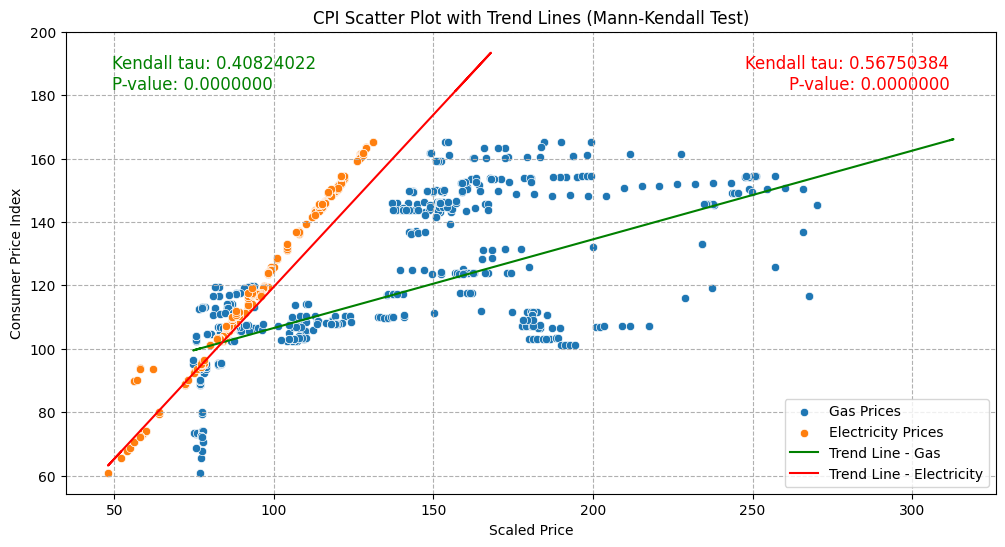

In [ ]:
CPI2 = CPI[:merged_data.shape[0]]
mk_test_result_gas = kendalltau(merged_data['scaled_gas_price'], CPI2['Consumer_Price_Index'])
mk_test_result_electricity = kendalltau(merged_data['scaled_electricity_price'], CPI2['Consumer_Price_Index'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['scaled_gas_price'], y=CPI2['Consumer_Price_Index'], label='Gas Prices')
sns.scatterplot(x=merged_data['scaled_electricity_price'], y=CPI2['Consumer_Price_Index'], label='Electricity Prices')
z_gas = np.polyfit(merged_data['scaled_gas_price'], CPI2['Consumer_Price_Index'], 1)
p_gas = np.poly1d(z_gas)
z_electricity = np.polyfit(merged_data['scaled_electricity_price'], CPI2['Consumer_Price_Index'], 1)
p_electricity = np.poly1d(z_electricity)
plt.plot(merged_data['scaled_gas_price'], p_gas(merged_data['scaled_gas_price']), "g", label='Trend Line - Gas')
plt.plot(merged_data['scaled_electricity_price'], p_electricity(merged_data['scaled_electricity_price']), "r", label='Trend Line - Electricity')
plt.text(0.05, 0.95, f"Kendall tau: {mk_test_result_gas.correlation:.8f}\nP-value: {mk_test_result_gas.pvalue:.7f}",
         color='green', fontsize=12, transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.95, 0.95, f"Kendall tau: {mk_test_result_electricity.correlation:.8f}\nP-value: {mk_test_result_electricity.pvalue:.7f}",
         color='red', fontsize=12, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')
plt.title('CPI Scatter Plot with Trend Lines (Mann-Kendall Test)')
plt.xlabel('Scaled Price')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.legend(loc='lower right')
plt.show()

****





### **Both gas prices and electricity prices show a positive correlation with the Consumer Price Index.**


### **The Mann-Kendall test results for both gas prices and electricity prices have very low p-values below 0.05. This suggests that the positive trends are statistically significant, and not likely due to random chance.**


### **This implies that changes in these prices could be an predictor of changes in the overall consumer price index.**







****

****

# **Spearman's Rho Test**

$ \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $

where:  
$\rho$ is Spearman's rank correlation coefficient, a non-parametric measure of rank correlation, which assesses how well the relationship between two variables can be described using a monotonic function. It evaluates the degree of association or correlation between the rank orders of two variables in a dataset.  
$d_i$ is the difference between the ranks of corresponding variables $x$ and $y$ for each observation. Specifically, for each pair of observations, $d_i$ is calculated by subtracting the rank of $y$ from the rank of $x$. This value can be positive, negative, or zero, depending on the relative ranks of each pair.  
$n$ is the number of observations in the data set. This represents the total number of paired ranks that the correlation coefficient is calculated over. The value of $n$ affects the denominator of the formula, adjusting the scale of the summation of squared rank differences in relation to the number of observations.

The constant 6 in the numerator standardizes the distribution of differences such that the correlation coefficient adheres to the bounds of -1 and +1. This constant emerges from the algebraic development of the Spearman's rho formula and ensures that the coefficient appropriately reflects the degree of correlation when all ranks are unique.

By squaring the rank differences and summing them up, the numerator captures the extent of rank disagreement between the two variables. The denominator normalizes this sum based on the sample size, with the term $(n^2 - 1)$ accounting for the variance of the ranks when they are perfectly distributed.


****

In [ ]:
from scipy.stats import spearmanr

spearman_test_result = spearmanr(merged_data['GAS'], CPI2['Consumer_Price_Index'])
print(f"Spearman's Rho Test statistic: {spearman_test_result.correlation}, p-value: {spearman_test_result.pvalue}")

Spearman's Rho Test statistic: 0.6007630048037491, p-value: 2.6763252056613963e-53


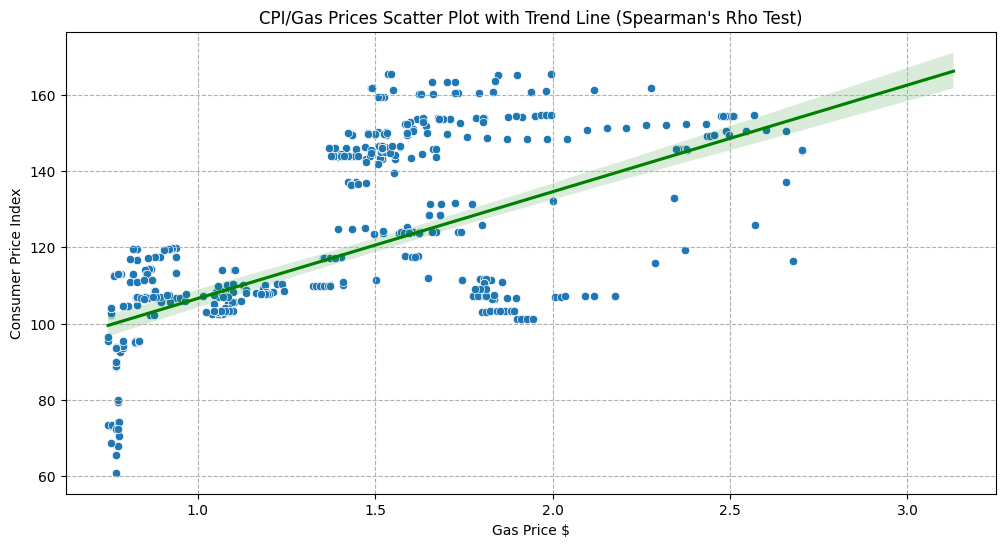

In [ ]:
spearman_test_result = spearmanr(merged_data['GAS'], CPI2['Consumer_Price_Index'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['GAS'], y=CPI2['Consumer_Price_Index'])
sns.regplot(x=merged_data['GAS'], y=CPI2['Consumer_Price_Index'], scatter=False, color='green')
#plt.text(x=min(merged_data['GAS']), y=max(CPI2['Consumer_Price_Index']),
#        s=f"  Spearman's Rho: {spearman_test_result.correlation:.4f}\n  P-value: {spearman_test_result.pvalue:.4f}",
#         color='green',
#         fontsize=14,
#         verticalalignment='top')
plt.title('CPI/Gas Prices Scatter Plot with Trend Line (Spearman\'s Rho Test)')
plt.xlabel('Gas Price $')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
spearman_test_result = spearmanr(merged_data['ELECTRICITY'], CPI2['Consumer_Price_Index'])
print(f"Spearman's Rho Test statistic: {spearman_test_result.correlation}, p-value: {spearman_test_result.pvalue}")

Spearman's Rho Test statistic: 0.7946694168644876, p-value: 1.5115175322467219e-116


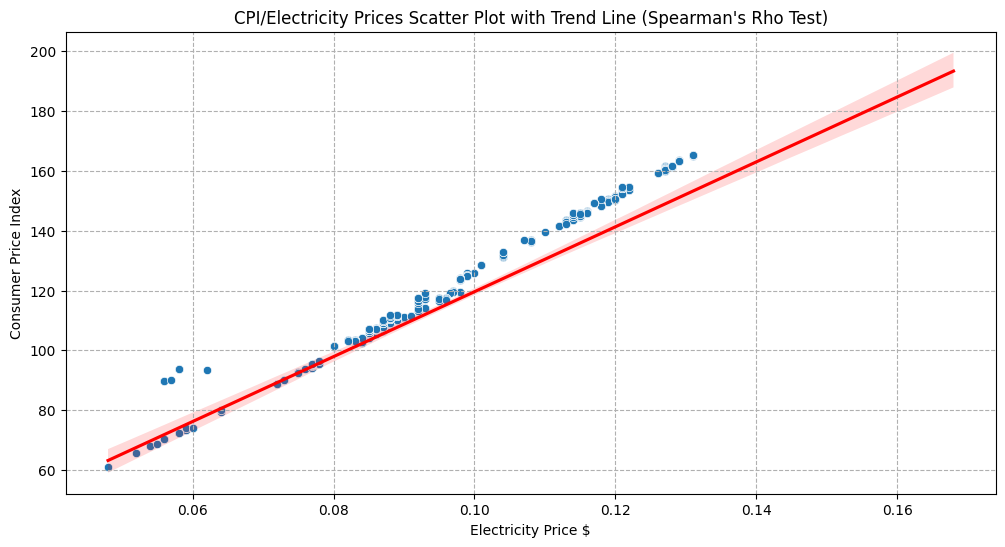

In [ ]:
spearman_test_result = spearmanr(merged_data['ELECTRICITY'], CPI2['Consumer_Price_Index'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['ELECTRICITY'], y=CPI2['Consumer_Price_Index'])
sns.regplot(x=merged_data['ELECTRICITY'], y=CPI2['Consumer_Price_Index'], scatter=False, color='red')
#plt.text(x=min(merged_data['ELECTRICITY']), y=max(CPI2['Consumer_Price_Index']),
#        s=f"    Spearman's Rho: {spearman_test_result.correlation:.4f}\n    P-value: {spearman_test_result.pvalue:.7f}",
#         color='red',
#         fontsize=14,
#         verticalalignment='top')
plt.title('CPI/Electricity Prices Scatter Plot with Trend Line (Spearman\'s Rho Test)')
plt.xlabel('Electricity Price $')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

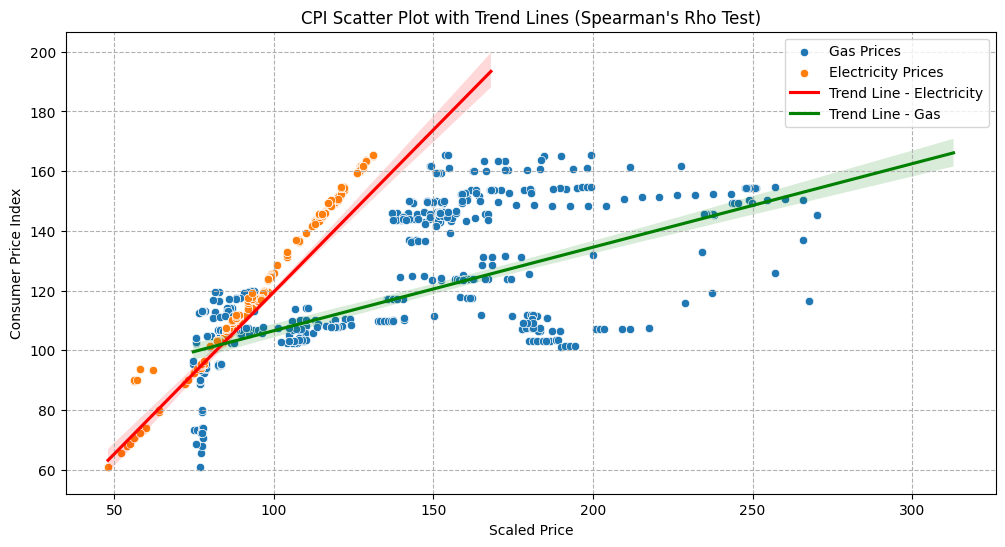

In [ ]:
spearman_test_result_gas = spearmanr(merged_data['scaled_gas_price'], CPI2['Consumer_Price_Index'])
spearman_test_result_electricity = spearmanr(merged_data['scaled_electricity_price'], CPI2['Consumer_Price_Index'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_data['scaled_gas_price'], y=CPI2['Consumer_Price_Index'], label='Gas Prices')
sns.scatterplot(x=merged_data['scaled_electricity_price'], y=CPI2['Consumer_Price_Index'], label='Electricity Prices')
sns.regplot(x=merged_data['scaled_electricity_price'], y=CPI2['Consumer_Price_Index'], scatter=False, color='red', label='Trend Line - Electricity')
sns.regplot(x=merged_data['scaled_gas_price'], y=CPI2['Consumer_Price_Index'], scatter=False, color='green', label='Trend Line - Gas')
gas_x_position = merged_data['scaled_gas_price'].mean() + merged_data['scaled_gas_price'].std()
gas_y_position = min(CPI2['Consumer_Price_Index'])
electric_x_position = max(merged_data['scaled_electricity_price']) * 0.85
electric_y_position = min(CPI2['Consumer_Price_Index'])
#plt.text(x=gas_x_position, y=gas_y_position,
#         s=f"Spearman's Rho: {spearman_test_result_gas.correlation:.4f}\nP-value: {spearman_test_result_gas.pvalue:.7f}",
#         color='green', fontsize=11, backgroundcolor='white')
#plt.text(x=electric_x_position, y=electric_y_position,
#         s=f"Spearman's Rho: {spearman_test_result_electricity.correlation:.4f}\nP-value: {spearman_test_result_electricity.pvalue:.7f}",
#         color='red', fontsize=11, backgroundcolor='white')
plt.title('CPI Scatter Plot with Trend Lines (Spearman\'s Rho Test)')
plt.xlabel('Scaled Price')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

****


### **The Spearman's rho for gas prices is quite high, 0.7947, which shows a strong positive monotonic relationship with the CPI. The fact that the p-value is extremely low means that this correlation is statistically significant.**

### **Electricity prices also show a positive monotonic relationship with the CPI, 0.6008. While this is lower than the correlation for gas prices, it still indicates a positive association. The p-value is again extremely low, confirming the significance of this relationship.**

### **Gas prices have a stronger monotonic relationship with CPI compared to electricity prices. This means that variations in gas prices are more closely associated with changes in the CPI.**

### **While the Spearman's rho test can highlight correlations, it does not establish causality. This means that although there is a strong relationship between these prices and CPI, it cannot be concluded that changes in gas or electricity prices cause changes in CPI without further analysis.**







****

****

# **Granger Causality Test**
### **To help determine whether hurricane occurrences can help to predict CPI.**

$ Y_t = \alpha + \sum_{i=1}^{p} \beta_i Y_{t-i} + \sum_{i=1}^{p} \gamma_i X_{t-i} + \epsilon_t $  
where:  
$Y_t$ is the current value of the dependent time series,  
$\alpha$ is the intercept term of the equation,  
$\beta_i$ are the coefficients of the lagged values of the dependent series $Y$,  
$\gamma_i$ are the coefficients of the lagged values of the independent series $X$ that are being tested for causing $Y$,  
$p$ is the number of lags included in the model,  
$\epsilon_t$ is the error term at time $t$.  

$ F = \frac{(SSR_{0} - SSR_{1}) / (p - q)}{SSR_{1} / (T - p - 1)} $  
where:  
$F$ is the F-statistic for Granger causality,  
$SSR_{0}$ is the sum of squared residuals from the unrestricted model (including both $X$ and $Y$),  
$SSR_{1}$ is the sum of squared residuals from the restricted model (including $Y$ only),  
$p$ is the number of lags in the unrestricted model,  
$q$ is the number of lags actually included in the restricted model (often $q=0$ in Granger causality tests),  
$T$ is the total number of observations.




****

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

merged_data['lagged_hurricane'] = merged_data['hurricane'].shift(1)

start_date = '1978-11-01'
end_date = '2024-01-01'
data_to_test = merged_data[start_date:end_date]
data_to_test.fillna(0, inplace=True)
data_to_test.replace([np.inf, -np.inf], 0, inplace=True)

max_lags = 60
test_result2 = grangercausalitytests(data_to_test[['CPI_DIFF_1', 'lagged_hurricane']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3384  , p=0.0377  , df_denom=526, df_num=1
ssr based chi2 test:   chi2=4.3631  , p=0.0367  , df=1
likelihood ratio test: chi2=4.3452  , p=0.0371  , df=1
parameter F test:         F=4.3384  , p=0.0377  , df_denom=526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0598  , p=0.0477  , df_denom=523, df_num=2
ssr based chi2 test:   chi2=6.1780  , p=0.0455  , df=2
likelihood ratio test: chi2=6.1422  , p=0.0464  , df=2
parameter F test:         F=3.0598  , p=0.0477  , df_denom=523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2107  , p=0.0228  , df_denom=520, df_num=3
ssr based chi2 test:   chi2=9.7618  , p=0.0207  , df=3
likelihood ratio test: chi2=9.6725  , p=0.0216  , df=3
parameter F test:         F=3.2107  , p=0.0228  , df_denom=520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5034  , p=0.0415  

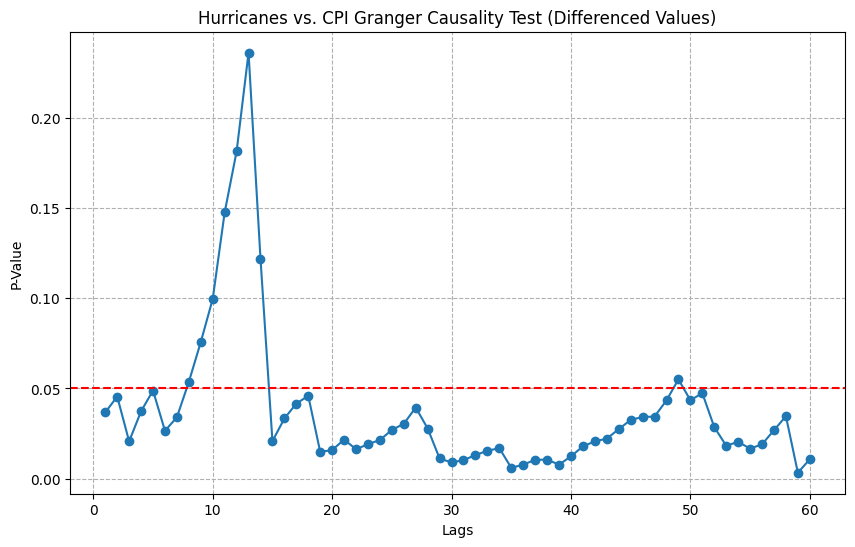

In [ ]:
max_lags = 60
p_values = []

for lag in range(1, max_lags + 1):
    test_result_lag = test_result2[lag][0]
    p_value = test_result_lag['ssr_chi2test'][1]
    p_values.append(p_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lags + 1), p_values, marker='o', linestyle='-')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Hurricanes vs. CPI Granger Causality Test (Differenced Values)')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.grid(True, linestyle='--')
plt.show()

****

**The p-values of lags 1 to 7, excluding lag 5, are below the 0.05 threshold. This suggests that there's a predictive relationship for each of these lag periods.**

**Starting from lag 8, the p-values increase and fluctuate around the 0.05 threshold. This suggests that the predictive ability of past values starts becomes less consistent as more lags are included.**

**Also, there are certain lags, like 15, 19, 20, 22, 29, and 30, where the p-values dip below the 0.05 threshold. This shows that at these specific lags, past hurricane occurrences might have a predictive relationship with the future CPI values.**



****

****

# **Granger Causality Test**
### **To help determine whether economic "increase" events can help to predict CPI.**


****

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


merged_data['lagged_economic'] = merged_data['economic'].shift(1)
merged_data['lagged_economic'] -= merged_data['economic'].mean()
start_date = '1978-11-01'
end_date = '2024-01-01'
data_to_test = merged_data[start_date:end_date]
data_to_test.fillna(0, inplace=True)
data_to_test.replace([np.inf, -np.inf], 0, inplace=True)
max_lags = 60
test_result2 = grangercausalitytests(data_to_test[['CPI_DIFF_1', 'lagged_economic']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=21.6185 , p=0.0000  , df_denom=526, df_num=1
ssr based chi2 test:   chi2=21.7418 , p=0.0000  , df=1
likelihood ratio test: chi2=21.3069 , p=0.0000  , df=1
parameter F test:         F=21.6185 , p=0.0000  , df_denom=526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.4206 , p=0.0000  , df_denom=523, df_num=2
ssr based chi2 test:   chi2=25.0787 , p=0.0000  , df=2
likelihood ratio test: chi2=24.5013 , p=0.0000  , df=2
parameter F test:         F=12.4206 , p=0.0000  , df_denom=523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.0828  , p=0.0000  , df_denom=520, df_num=3
ssr based chi2 test:   chi2=24.5747 , p=0.0000  , df=3
likelihood ratio test: chi2=24.0189 , p=0.0000  , df=3
parameter F test:         F=8.0828  , p=0.0000  , df_denom=520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.4202  , p=0.0000  

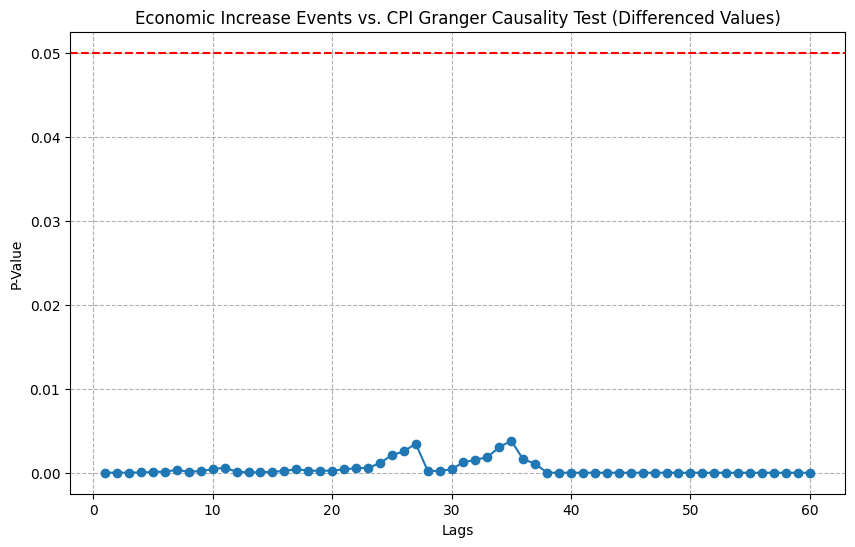

In [ ]:
max_lags = 60
p_values = []

for lag in range(1, max_lags + 1):
    test_result_lag = test_result2[lag][0]
    p_value = test_result_lag['ssr_chi2test'][1]
    p_values.append(p_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lags + 1), p_values, marker='o', linestyle='-')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Economic Increase Events vs. CPI Granger Causality Test (Differenced Values)')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.grid(True, linestyle='--')
plt.show()

****

# **Granger Causality Test**
### **To help determine whether economic "decrease" events can help to predict CPI.**


****

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


merged_data['lagged_economic2'] = merged_data['economic2'].shift(1)
merged_data['lagged_economic2'] -= merged_data['economic2'].mean()
start_date = '1978-11-01'
end_date = '2024-01-01'
data_to_test = merged_data[start_date:end_date]
data_to_test.fillna(0, inplace=True)
data_to_test.replace([np.inf, -np.inf], 0, inplace=True)
max_lags = 60
test_result2 = grangercausalitytests(data_to_test[['CPI_DIFF_1', 'lagged_economic2']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7649  , p=0.0295  , df_denom=526, df_num=1
ssr based chi2 test:   chi2=4.7921  , p=0.0286  , df=1
likelihood ratio test: chi2=4.7705  , p=0.0290  , df=1
parameter F test:         F=4.7649  , p=0.0295  , df_denom=526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8632  , p=0.0580  , df_denom=523, df_num=2
ssr based chi2 test:   chi2=5.7812  , p=0.0555  , df=2
likelihood ratio test: chi2=5.7498  , p=0.0564  , df=2
parameter F test:         F=2.8632  , p=0.0580  , df_denom=523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8050  , p=0.1452  , df_denom=520, df_num=3
ssr based chi2 test:   chi2=5.4878  , p=0.1394  , df=3
likelihood ratio test: chi2=5.4594  , p=0.1411  , df=3
parameter F test:         F=1.8050  , p=0.1452  , df_denom=520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3952  , p=0.2344  

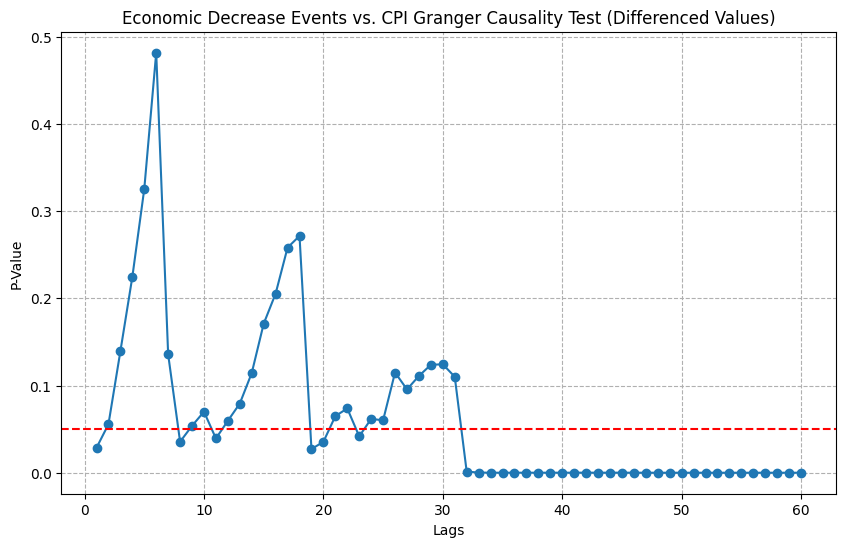

In [ ]:
max_lags = 60
p_values = []

for lag in range(1, max_lags + 1):
    test_result_lag = test_result2[lag][0]
    p_value = test_result_lag['ssr_chi2test'][1]
    p_values.append(p_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lags + 1), p_values, marker='o', linestyle='-')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Economic Decrease Events vs. CPI Granger Causality Test (Differenced Values)')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.grid(True, linestyle='--')
plt.show()

****

# **Granger Causality Test**
### **To help determine whether Electricity Prices can help to predict CPI.**


****

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


merged_data['lagged_electricity'] = merged_data['diff_electricity_price'].shift(1)
merged_data['lagged_electricity'] -= merged_data['diff_electricity_price'].mean()
start_date = '1978-11-01'
end_date = '2024-01-01'
data_to_test = merged_data[start_date:end_date]
data_to_test.fillna(0, inplace=True)
data_to_test.replace([np.inf, -np.inf], 0, inplace=True)
max_lags = 60
test_result2 = grangercausalitytests(data_to_test[['CPI_DIFF_1', 'lagged_electricity']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0051  , p=0.9431  , df_denom=526, df_num=1
ssr based chi2 test:   chi2=0.0051  , p=0.9429  , df=1
likelihood ratio test: chi2=0.0051  , p=0.9429  , df=1
parameter F test:         F=0.0051  , p=0.9431  , df_denom=526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4820  , p=0.6178  , df_denom=523, df_num=2
ssr based chi2 test:   chi2=0.9732  , p=0.6147  , df=2
likelihood ratio test: chi2=0.9723  , p=0.6150  , df=2
parameter F test:         F=0.4820  , p=0.6178  , df_denom=523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5740  , p=0.6323  , df_denom=520, df_num=3
ssr based chi2 test:   chi2=1.7451  , p=0.6270  , df=3
likelihood ratio test: chi2=1.7422  , p=0.6276  , df=3
parameter F test:         F=0.5740  , p=0.6323  , df_denom=520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1478  , p=0.3332  

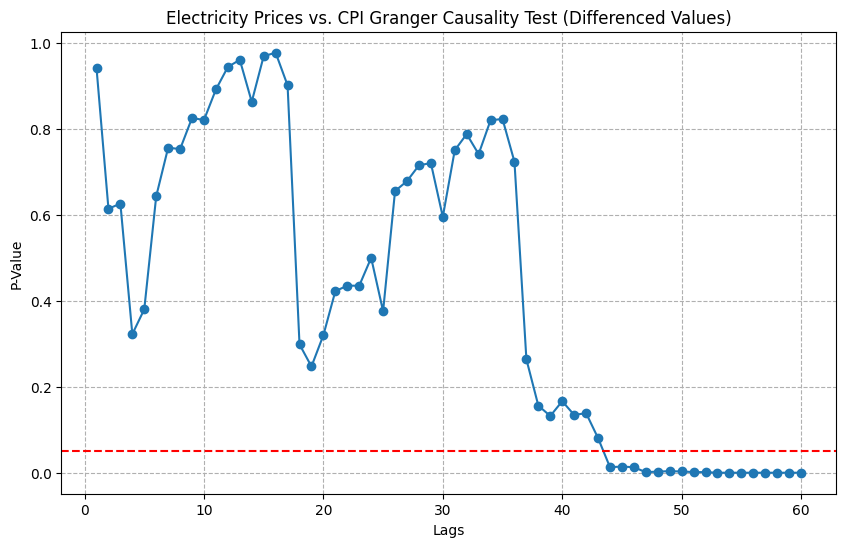

In [ ]:
max_lags = 60
p_values = []

for lag in range(1, max_lags + 1):
    test_result_lag = test_result2[lag][0]
    p_value = test_result_lag['ssr_chi2test'][1]
    p_values.append(p_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lags + 1), p_values, marker='o', linestyle='-')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Electricity Prices vs. CPI Granger Causality Test (Differenced Values)')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.grid(True, linestyle='--')
plt.show()

****

# **Granger Causality Test**
### **To help determine whether Gas Prices can help to predict CPI.**


****

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


merged_data['lagged_gas'] = merged_data['diff_gas_price'].shift(1)
merged_data['lagged_gas'] -= merged_data['diff_gas_price'].mean()
start_date = '1978-11-01'
end_date = '2024-01-01'
data_to_test = merged_data[start_date:end_date]
data_to_test.fillna(0, inplace=True)
data_to_test.replace([np.inf, -np.inf], 0, inplace=True)
max_lags = 60
test_result2 = grangercausalitytests(data_to_test[['CPI_DIFF_1', 'lagged_gas']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0381  , p=0.0819  , df_denom=526, df_num=1
ssr based chi2 test:   chi2=3.0554  , p=0.0805  , df=1
likelihood ratio test: chi2=3.0466  , p=0.0809  , df=1
parameter F test:         F=3.0381  , p=0.0819  , df_denom=526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7529  , p=0.0647  , df_denom=523, df_num=2
ssr based chi2 test:   chi2=5.5584  , p=0.0621  , df=2
likelihood ratio test: chi2=5.5294  , p=0.0630  , df=2
parameter F test:         F=2.7529  , p=0.0647  , df_denom=523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7795  , p=0.1500  , df_denom=520, df_num=3
ssr based chi2 test:   chi2=5.4104  , p=0.1441  , df=3
likelihood ratio test: chi2=5.3828  , p=0.1458  , df=3
parameter F test:         F=1.7795  , p=0.1500  , df_denom=520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0998  , p=0.0796  

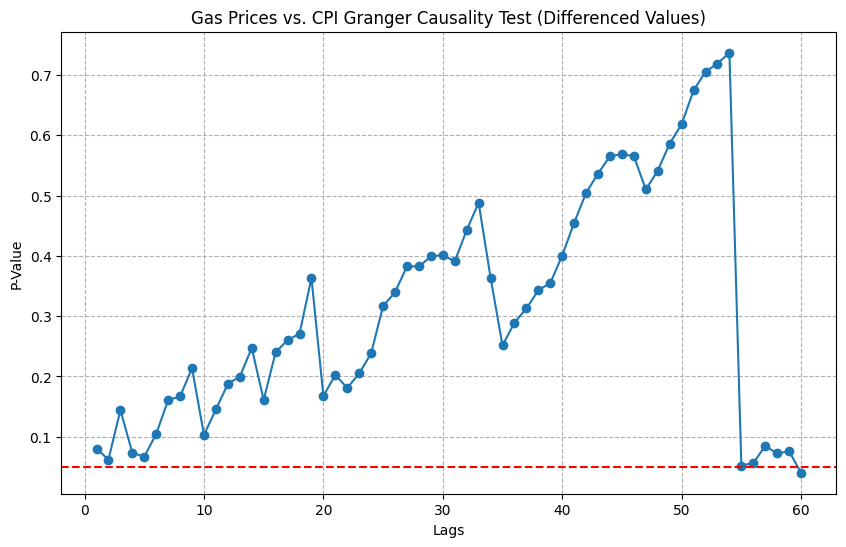

In [ ]:
max_lags = 60
p_values = []

for lag in range(1, max_lags + 1):
    test_result_lag = test_result2[lag][0]
    p_value = test_result_lag['ssr_chi2test'][1]
    p_values.append(p_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lags + 1), p_values, marker='o', linestyle='-')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Gas Prices vs. CPI Granger Causality Test (Differenced Values)')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.grid(True, linestyle='--')
plt.show()

****


### **There is no statistically significant evidence of Granger causality from gas prices to the CPI at any of the lag lengths tested. This means that, based on this test, past values of gas prices do not provide information that is useful in predicting future values of CPI.**

### **While gas prices may still have some influence on CPI, this influence does not appear to be strong enough to be detected as a causal relationship in the context of this test.**







****

****


# **Johansen Cointegration Test**





The Johansen cointegration test involves estimating the following vector error correction model (VECM):

$$
\Delta \mathbf{Y}_t = \Pi \mathbf{Y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{Y}_{t-i} + \mathbf{\epsilon}_t
$$

where:
- $\Delta$ denotes the first difference operator, which is used to transform non-stationary I(1) variables into stationary series.
- $\mathbf{Y}_t$ is the $n \times 1$ vector of non-stationary I(1) variables at time $t$.
- $\Pi$ is the $n \times n$ matrix of coefficients to the levels of the variables in $\mathbf{Y}_{t-1}$, capturing the long-run relationships. A non-zero matrix $\Pi$ suggests the presence of cointegration.
- $\Gamma_i$ are the $n \times n$ matrices of coefficients to the differenced variables, capturing the short-run dynamics within the series.
- $\mathbf{\epsilon}_t$ is the $n \times 1$ vector of white noise error terms.

The matrix $\Pi$ can be further decomposed as $\Pi = \alpha \beta'$, where $\alpha$ and $\beta$ are $n \times r$ matrices of rank $r \leq n$, and $\beta'$ represents the cointegrating vectors.

The hypothesis tests involved in the Johansen cointegration test are based on the rank of the matrix $\Pi$, with the null hypothesis $H_0: \text{rank}(\Pi) = r$ against the alternative $H_1: \text{rank}(\Pi) > r$. The test statistics used are the trace and maximum eigenvalue statistics, which compare the estimated eigenvalues of $\Pi$ to their critical values.

The test statistics for determining the number of cointegrating vectors are the trace and the maximum eigenvalue statistics.

- The trace statistic:
$$
\lambda_{trace} = -T \sum_{i=r+1}^{n} \ln(1 - \hat{\lambda}_i),
$$
which is the sum of the estimated eigenvalues from $r+1$ to $n$.

- The maximum eigenvalue statistic:
$$
\lambda_{max} = -T \ln(1 - \hat{\lambda}_{r+1}),
$$
which focuses on the largest eigenvalue when testing from $r$ to $r+1$ cointegrating relationships.

In both statistics, $T$ represents the sample size, and $\hat{\lambda}_i$ are the estimated eigenvalues, ordered from largest to smallest. The estimated eigenvalues are obtained from the characteristic equation of the estimated VECM. These statistics are then compared against critical values from their respective non-standard distributions under the null hypothesis.





****

Test Statistic: [7.34130587 0.01960693]
Critical Values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


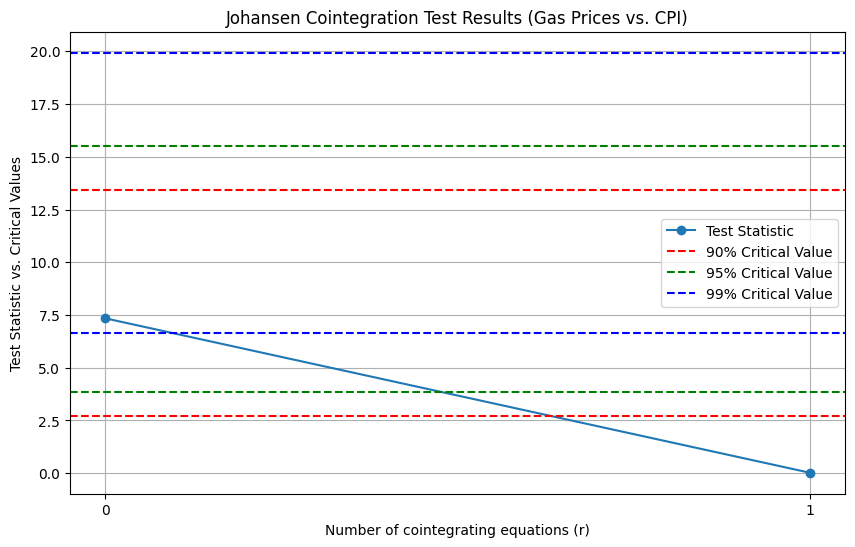

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen
data_to_test = merged_data[['GAS', 'Consumer_Price_Index']].copy()
data_to_test_values = data_to_test.values
num_lags = 6
johansen_test = coint_johansen(data_to_test_values, det_order=0, k_ar_diff=num_lags)
print('Test Statistic:', johansen_test.lr1)
print('Critical Values (90%, 95%, 99%):', johansen_test.cvt)
plt.figure(figsize=(10, 6))
plt.plot(johansen_test.lr1, marker='o', label='Test Statistic')
for i, cv in enumerate(johansen_test.cvt[:, 0]):
    plt.axhline(y=cv, color='r', linestyle='--', label='90% Critical Value' if i == 0 else "")
for i, cv in enumerate(johansen_test.cvt[:, 1]):
    plt.axhline(y=cv, color='g', linestyle='--', label='95% Critical Value' if i == 0 else "")
for i, cv in enumerate(johansen_test.cvt[:, 2]):
    plt.axhline(y=cv, color='b', linestyle='--', label='99% Critical Value' if i == 0 else "")
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.title('Johansen Cointegration Test Results (Gas Prices vs. CPI)')
plt.xlabel('Number of cointegrating equations (r)')
plt.ylabel('Test Statistic vs. Critical Values')
plt.legend()
plt.grid(True)
plt.show()

Test Statistic: [27.37770583  0.27986929]
Critical Values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


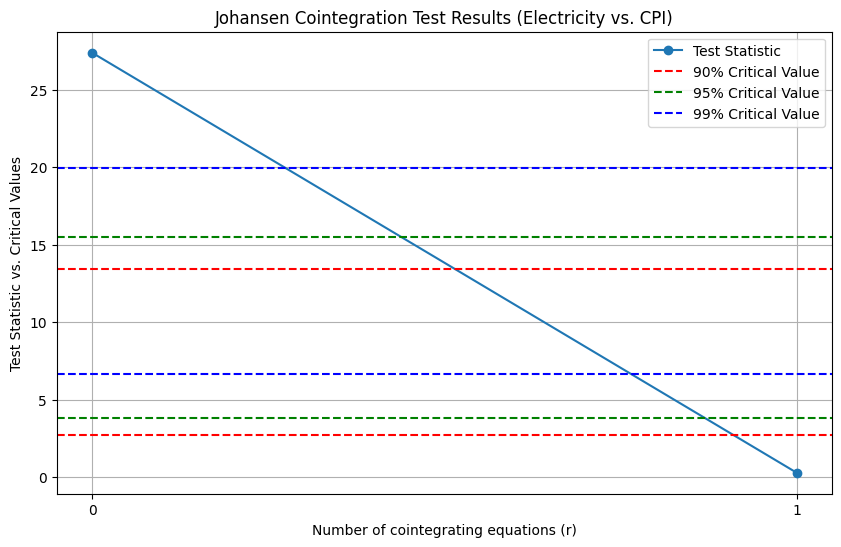

In [ ]:
data_to_test = merged_data[['ELECTRICITY', 'Consumer_Price_Index']].copy()
data_to_test_values = data_to_test.values
num_lags = 6
johansen_test = coint_johansen(data_to_test_values, det_order=0, k_ar_diff=num_lags)
print('Test Statistic:', johansen_test.lr1)
print('Critical Values (90%, 95%, 99%):', johansen_test.cvt)
plt.figure(figsize=(10, 6))
plt.plot(johansen_test.lr1, marker='o', label='Test Statistic')
for i, cv in enumerate(johansen_test.cvt[:, 0]):
    plt.axhline(y=cv, color='r', linestyle='--', label='90% Critical Value' if i == 0 else "")
for i, cv in enumerate(johansen_test.cvt[:, 1]):
    plt.axhline(y=cv, color='g', linestyle='--', label='95% Critical Value' if i == 0 else "")
for i, cv in enumerate(johansen_test.cvt[:, 2]):
    plt.axhline(y=cv, color='b', linestyle='--', label='99% Critical Value' if i == 0 else "")
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.title('Johansen Cointegration Test Results (Electricity vs. CPI)')
plt.xlabel('Number of cointegrating equations (r)')
plt.ylabel('Test Statistic vs. Critical Values')
plt.legend()
plt.grid(True)
plt.show()

****





# **Hurricane Events Study & Difference-in-Differences (DiD) Analysis Using Generalized Least Squares with Autoregressive Errors (GLSAR) Linear Regression Model**




****

                                 GLSAR Regression Results                                
Dep. Variable:     Consumer_Price_Index   R-squared (uncentered):                   0.288
Model:                            GLSAR   Adj. R-squared (uncentered):              0.283
Method:                   Least Squares   F-statistic:                              55.51
Date:                  Sun, 21 Apr 2024   Prob (F-statistic):                    4.14e-30
Time:                          14:12:23   Log-Likelihood:                         -1158.3
No. Observations:                   411   AIC:                                      2323.
Df Residuals:                       408   BIC:                                      2335.
Df Model:                             3                                                  
Covariance Type:                    HC3                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

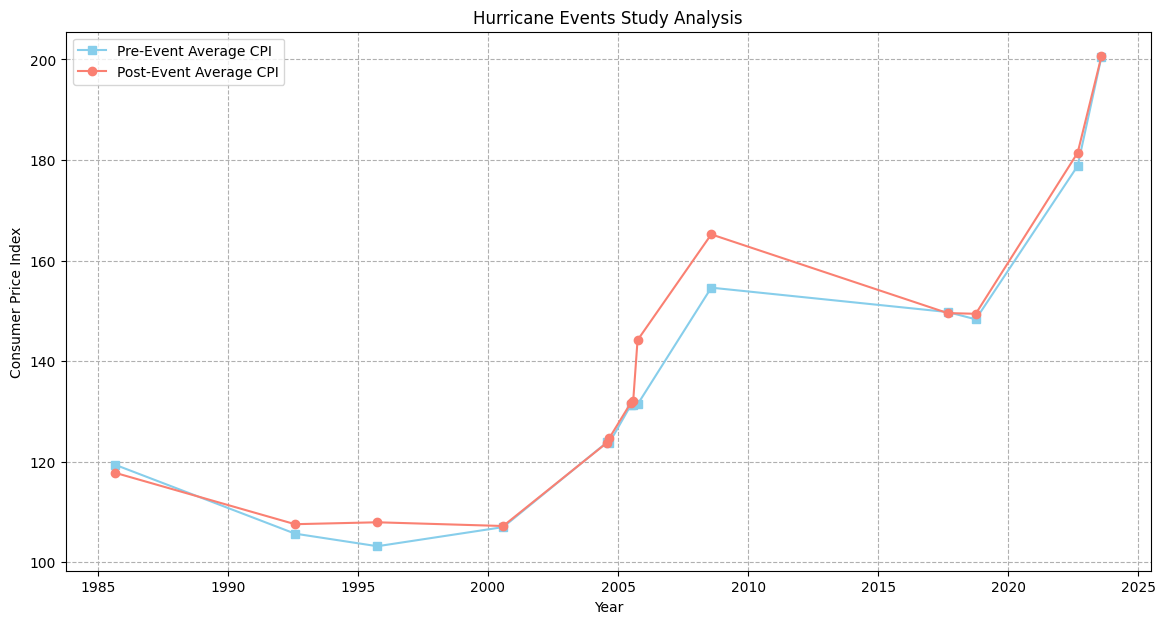

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import GLSAR

event_dates = pd.to_datetime([
    '2023-08-01', '2022-09-01', '2018-10-01', '2017-09-01', '2008-08-01',
    '2005-07-01', '2005-10-01', '2005-08-01', '2004-08-01',
    '2004-09-01', '2000-08-01', '1995-10-01', '1992-08-01', '1985-09-01'
])

CPI['Treatment'] = CPI.index.isin(event_dates).astype(int)

CPI['Post'] = (CPI.index > event_dates.min()).astype(int)

CPI['Post_Treatment'] = CPI['Post'] * CPI['Treatment']

lag_order = 144
model_glsar = GLSAR(CPI['Consumer_Price_Index'], CPI[['Post', 'Treatment', 'Post_Treatment']], rho=lag_order)
results_glsar = model_glsar.iterative_fit(maxiter=10)

print(results_glsar.get_robustcov_results(cov_type='HC3').summary())

event_study_df = pd.DataFrame()

for event_date in event_dates:
    pre_event_window = CPI.loc[event_date - pd.DateOffset(months=1):event_date - pd.DateOffset(days=1), 'Consumer_Price_Index']
    post_event_window = CPI.loc[event_date:event_date + pd.DateOffset(months=4), 'Consumer_Price_Index']

    pre_event_avg = pre_event_window.mean()
    post_event_avg = post_event_window.mean()

    event_study_df = pd.concat([
        event_study_df,
        pd.DataFrame({
            'event_date': [event_date],
            'pre_event_avg': [pre_event_avg],
            'post_event_avg': [post_event_avg]
        })
    ], ignore_index=True)

event_study_df.sort_values('event_date', inplace=True)

print(event_study_df)

plt.figure(figsize=(14, 7))
plt.plot(event_study_df['event_date'], event_study_df['pre_event_avg'], marker='s', linestyle='-', color='skyblue', label='Pre-Event Average CPI')
plt.plot(event_study_df['event_date'], event_study_df['post_event_avg'], marker='o', linestyle='-', color='salmon', label='Post-Event Average CPI')
plt.title('Hurricane Events Study Analysis')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

****


# **Economic Increase Events Study & Difference-in-Differences (DiD) Analysis Using Generalized Least Squares with Autoregressive Errors (GLSAR) Linear Regression Model**



****

                                 GLSAR Regression Results                                
Dep. Variable:     Consumer_Price_Index   R-squared (uncentered):                   0.367
Model:                            GLSAR   Adj. R-squared (uncentered):              0.363
Method:                   Least Squares   F-statistic:                              1.092
Date:                  Sun, 21 Apr 2024   Prob (F-statistic):                       0.352
Time:                          14:12:23   Log-Likelihood:                         -1504.4
No. Observations:                   471   AIC:                                      3015.
Df Residuals:                       468   BIC:                                      3027.
Df Model:                             3                                                  
Covariance Type:                    HC3                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

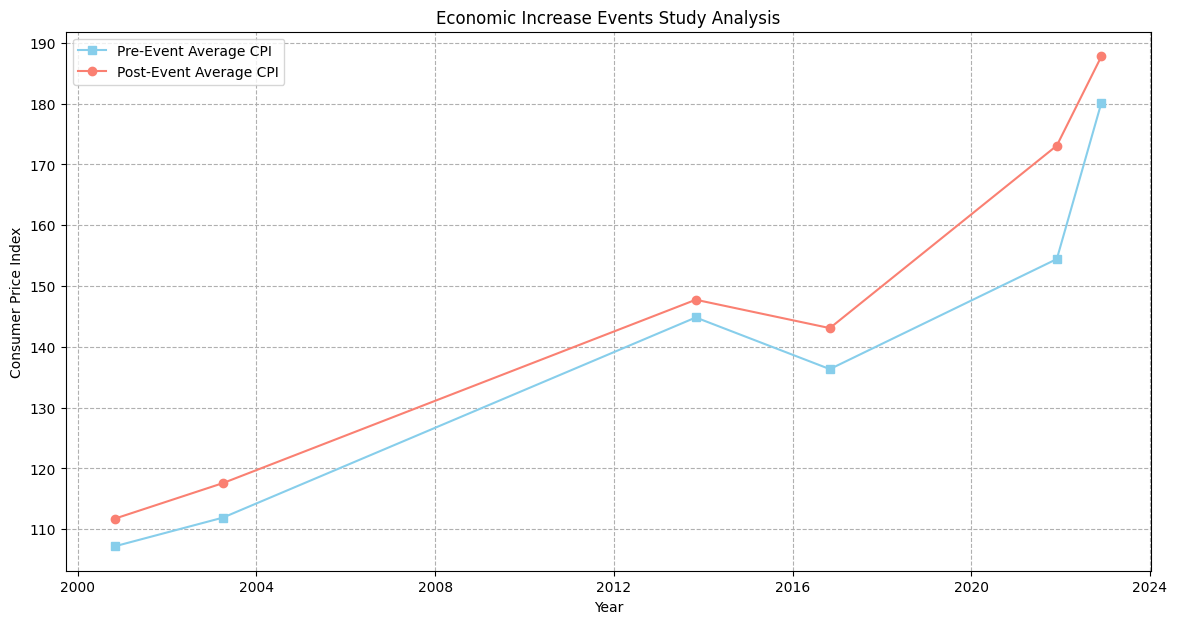

In [ ]:
import statsmodels.formula.api as smf

event_dates3 = pd.to_datetime([
    '2021-12-01', '2022-12-01', '2016-11-01', '2013-11-01', '2003-04-01', '2000-11-01'
])

CPI['Treatment'] = CPI.index.isin(event_dates3).astype(int)

CPI['Post'] = (CPI.index > event_dates3.min()).astype(int)

CPI['Post_Treatment'] = CPI['Post'] * CPI['Treatment']

lag_order = 84
model_glsar = GLSAR(CPI['Consumer_Price_Index'], CPI[['Post', 'Treatment', 'Post_Treatment']], rho=lag_order)
results_glsar = model_glsar.iterative_fit(maxiter=10)

print(results_glsar.get_robustcov_results(cov_type='HC3').summary())

event_study_df = pd.DataFrame()

for event_date in event_dates3:
    pre_event_window = CPI.loc[event_date - pd.DateOffset(months=1):event_date - pd.DateOffset(days=1), 'Consumer_Price_Index']
    post_event_window = CPI.loc[event_date:event_date + pd.DateOffset(months=3), 'Consumer_Price_Index']

    pre_event_avg = pre_event_window.mean()
    post_event_avg = post_event_window.mean()

    event_study_df = pd.concat([
        event_study_df,
        pd.DataFrame({
            'event_date': [event_date],
            'pre_event_avg': [pre_event_avg],
            'post_event_avg': [post_event_avg]
        })
    ], ignore_index=True)

event_study_df.sort_values('event_date', inplace=True)

print(event_study_df)

plt.figure(figsize=(14, 7))
plt.plot(event_study_df['event_date'], event_study_df['pre_event_avg'], marker='s', linestyle='-', color='skyblue', label='Pre-Event Average CPI')
plt.plot(event_study_df['event_date'], event_study_df['post_event_avg'], marker='o', linestyle='-', color='salmon', label='Post-Event Average CPI')
plt.title('Economic Increase Events Study Analysis')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

****




# **Economic Decrease Events Study & Difference-in-Differences (DiD) Analysis Using Generalized Least Squares with Autoregressive Errors (GLSAR) Linear Regression Model**




****

                                 GLSAR Regression Results                                
Dep. Variable:     Consumer_Price_Index   R-squared (uncentered):                   0.549
Model:                            GLSAR   Adj. R-squared (uncentered):              0.546
Method:                   Least Squares   F-statistic:                              3.155
Date:                  Sun, 21 Apr 2024   Prob (F-statistic):                      0.0249
Time:                          14:12:24   Log-Likelihood:                         -1257.7
No. Observations:                   375   AIC:                                      2521.
Df Residuals:                       372   BIC:                                      2533.
Df Model:                             3                                                  
Covariance Type:                    HC3                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

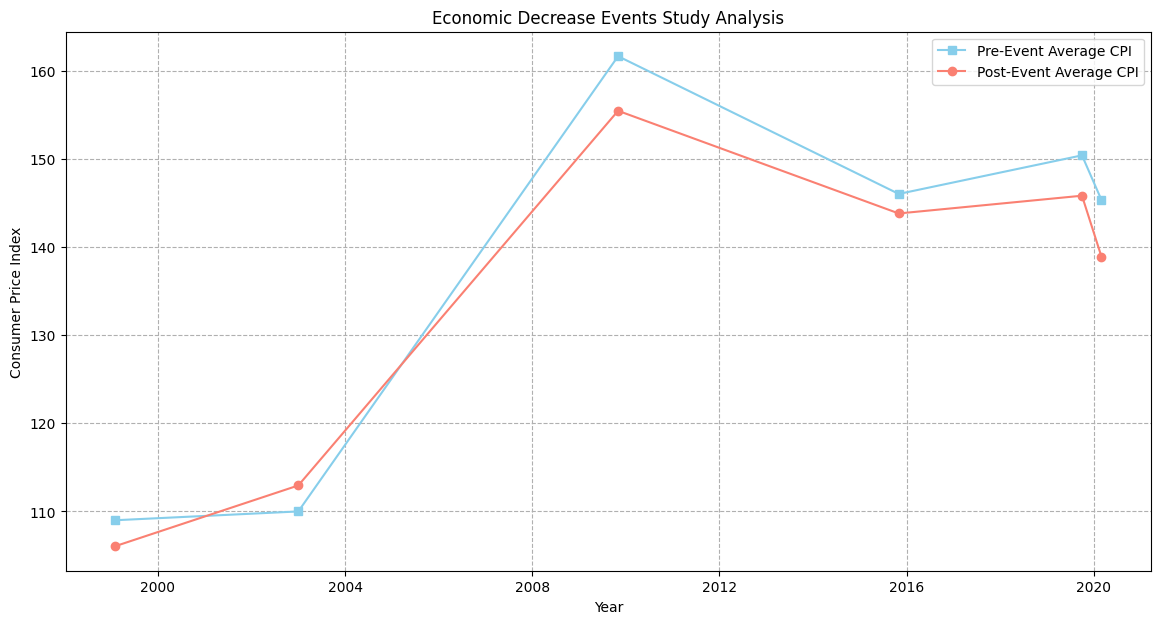

In [ ]:
import statsmodels.formula.api as smf

event_dates2 = pd.to_datetime([
    '2009-11-01', '2015-11-01', '2019-10-01', '2020-03-01', '2003-01-01', '1999-02-01'
])

CPI['Treatment'] = CPI.index.isin(event_dates2).astype(int)

CPI['Post'] = (CPI.index > event_dates2.min()).astype(int)

CPI['Post_Treatment'] = CPI['Post'] * CPI['Treatment']

lag_order = 180
model_glsar = GLSAR(CPI['Consumer_Price_Index'], CPI[['Post', 'Treatment', 'Post_Treatment']], rho=lag_order)
results_glsar = model_glsar.iterative_fit(maxiter=10)

print(results_glsar.get_robustcov_results(cov_type='HC3').summary())

event_study_df = pd.DataFrame()

for event_date in event_dates2:
    pre_event_window = CPI.loc[event_date - pd.DateOffset(months=1):event_date - pd.DateOffset(days=1), 'Consumer_Price_Index']
    post_event_window = CPI.loc[event_date:event_date + pd.DateOffset(months=3), 'Consumer_Price_Index']

    pre_event_avg = pre_event_window.mean()
    post_event_avg = post_event_window.mean()

    event_study_df = pd.concat([
        event_study_df,
        pd.DataFrame({
            'event_date': [event_date],
            'pre_event_avg': [pre_event_avg],
            'post_event_avg': [post_event_avg]
        })
    ], ignore_index=True)

event_study_df.sort_values('event_date', inplace=True)

print(event_study_df)

plt.figure(figsize=(14, 7))
plt.plot(event_study_df['event_date'], event_study_df['pre_event_avg'], marker='s', linestyle='-', color='skyblue', label='Pre-Event Average CPI')
plt.plot(event_study_df['event_date'], event_study_df['post_event_avg'], marker='o', linestyle='-', color='salmon', label='Post-Event Average CPI')
plt.title('Economic Decrease Events Study Analysis')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

****


# **Independent T-Test**

### **To compare the Consumer Price Index before and after hurricanes events and to assess if the events had a statistically significant impact on the CPI.**



****

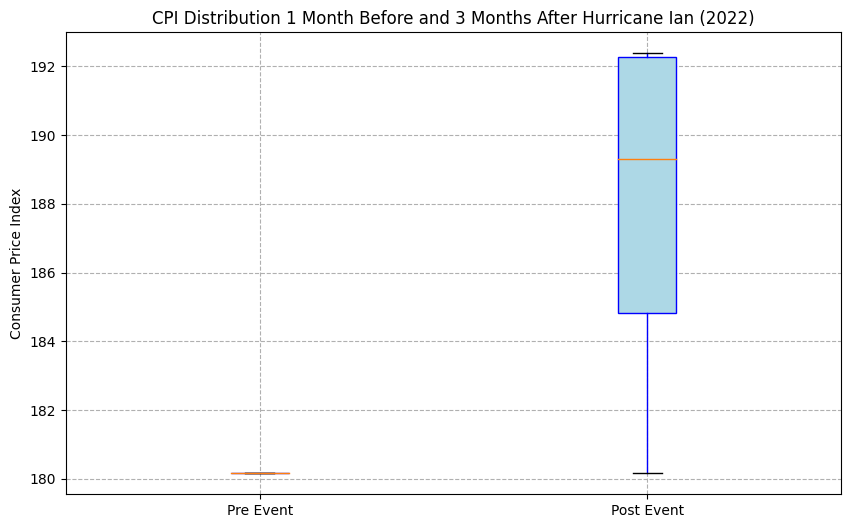

T-Statistic: -1.7522268710641193
P-Value: 0.15461357647400867


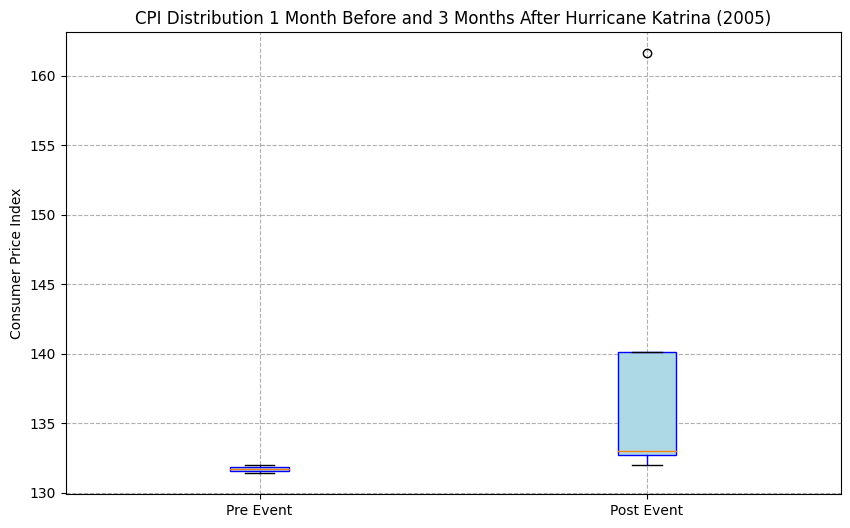

T-Statistic: -0.7552513081522068
P-Value: 0.492131084274073


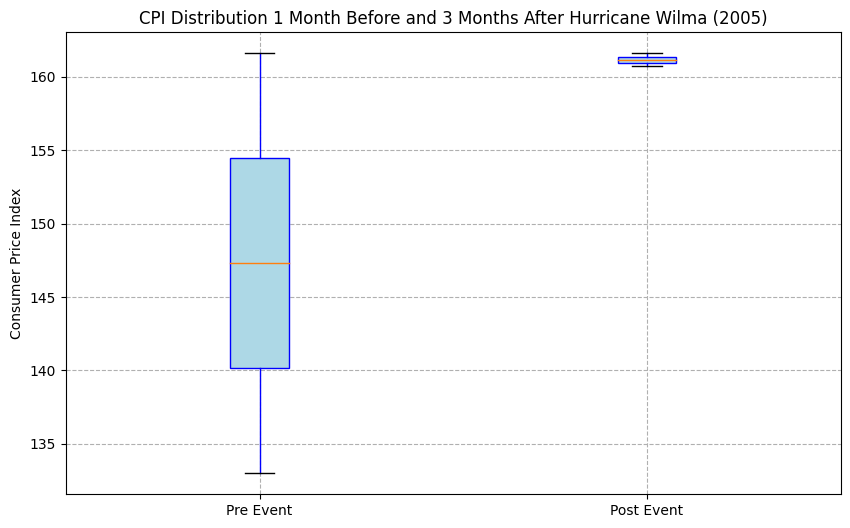

T-Statistic: -1.5807358637439197
P-Value: 0.18909346397890656


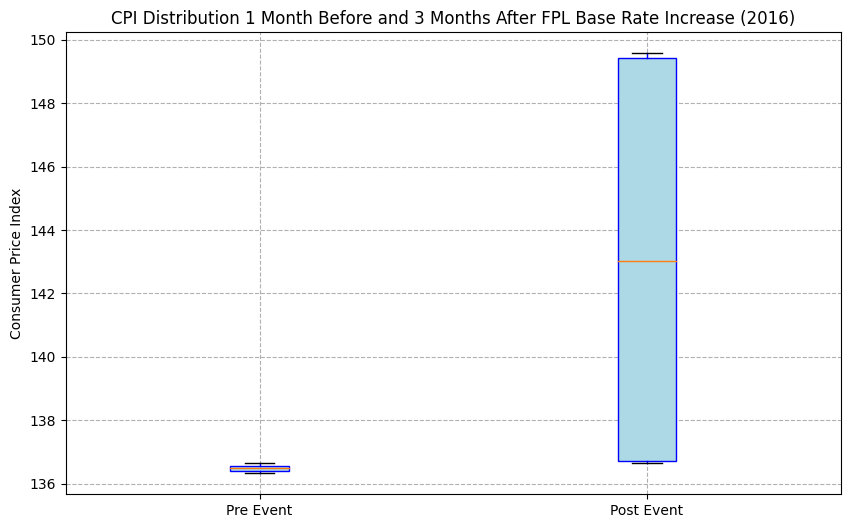

T-Statistic: -1.1898287772388318
P-Value: 0.29990788818597697


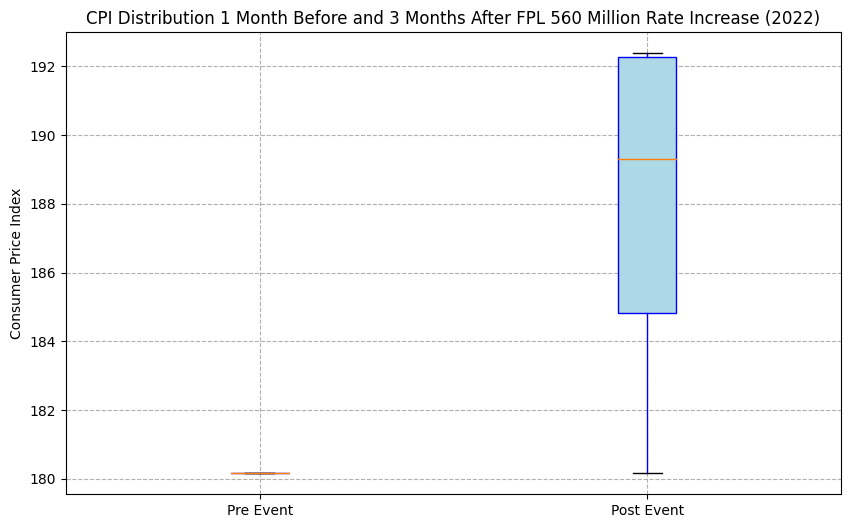

T-Statistic: -1.7522268710641193
P-Value: 0.15461357647400867


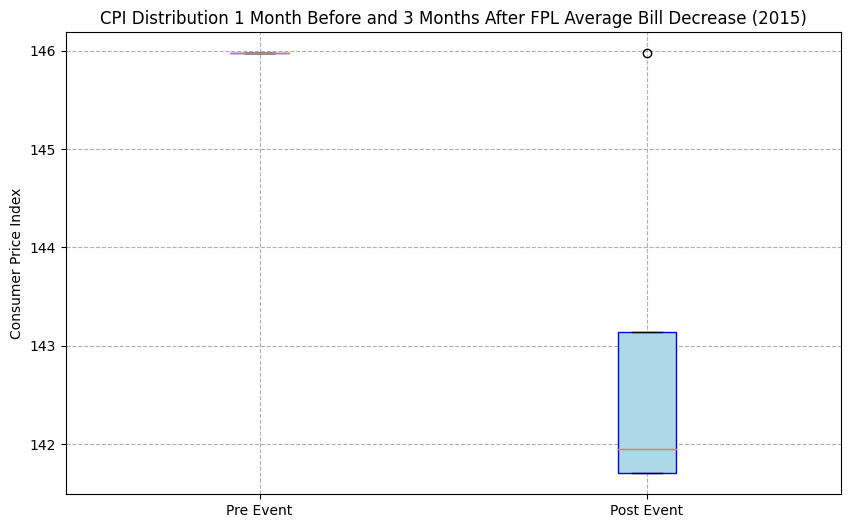

T-Statistic: 1.9868432412623018
P-Value: 0.11787530246529357


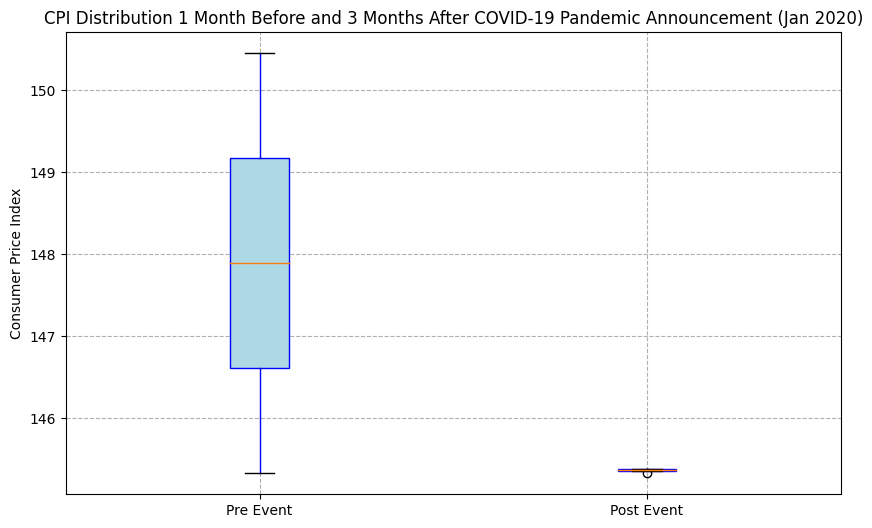

T-Statistic: 1.6107492819555533
P-Value: 0.18252380630734089


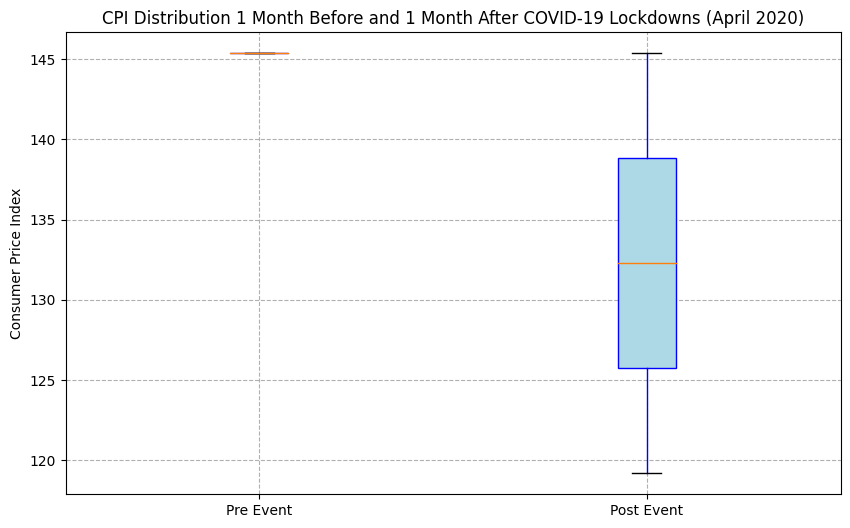

T-Statistic: 1.0000764000302265
P-Value: 0.4226203255483346


In [ ]:
import scipy.stats as stats

event_date = pd.to_datetime('2022-12-01')
event_date2 = pd.to_datetime('2005-10-01')
event_date3 = pd.to_datetime('2006-01-01')
event_date4 = pd.to_datetime('2016-11-01')
event_date5 = pd.to_datetime('2022-12-01')
event_date6 = pd.to_datetime('2015-12-01')
event_date7 = pd.to_datetime('2020-01-01')
event_date8 = pd.to_datetime('2020-04-01')

pre_event_start = event_date - pd.DateOffset(months=1)
post_event_end = event_date + pd.DateOffset(months=3)

pre_event_data = CPI.loc[pre_event_start:event_date, 'Consumer_Price_Index']
post_event_data = CPI.loc[event_date:post_event_end, 'Consumer_Price_Index']

data_to_plot = [pre_event_data, post_event_data]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After Hurricane Ian (2022)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data, post_event_data)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start2 = event_date2 - pd.DateOffset(months=1)
post_event_end2 = event_date2 + pd.DateOffset(months=3)

pre_event_data2 = CPI.loc[pre_event_start2:event_date2, 'Consumer_Price_Index']
post_event_data2 = CPI.loc[event_date2:post_event_end2, 'Consumer_Price_Index']

data_to_plot2 = [pre_event_data2, post_event_data2]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot2, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After Hurricane Katrina (2005)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data2, post_event_data2)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start3 = event_date3 - pd.DateOffset(months=1)
post_event_end3 = event_date3 + pd.DateOffset(months=3)

pre_event_data3 = CPI.loc[pre_event_start3:event_date3, 'Consumer_Price_Index']
post_event_data3 = CPI.loc[event_date3:post_event_end3, 'Consumer_Price_Index']

data_to_plot3 = [pre_event_data3, post_event_data3]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot3, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After Hurricane Wilma (2005)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data3, post_event_data3)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start4 = event_date4 - pd.DateOffset(months=1)
post_event_end4 = event_date4 + pd.DateOffset(months=3)

pre_event_data4 = CPI.loc[pre_event_start4:event_date4, 'Consumer_Price_Index']
post_event_data4 = CPI.loc[event_date4:post_event_end4, 'Consumer_Price_Index']

data_to_plot4 = [pre_event_data4, post_event_data4]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot4, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After FPL Base Rate Increase (2016)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data4, post_event_data4)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start5 = event_date5 - pd.DateOffset(months=1)
post_event_end5 = event_date5 + pd.DateOffset(months=3)

pre_event_data5 = CPI.loc[pre_event_start5:event_date5, 'Consumer_Price_Index']
post_event_data5 = CPI.loc[event_date5:post_event_end5, 'Consumer_Price_Index']

data_to_plot5 = [pre_event_data5, post_event_data5]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot5, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After FPL 560 Million Rate Increase (2022)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data5, post_event_data5)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start6 = event_date6 - pd.DateOffset(months=1)
post_event_end6 = event_date6 + pd.DateOffset(months=3)

pre_event_data6 = CPI.loc[pre_event_start6:event_date6, 'Consumer_Price_Index']
post_event_data6 = CPI.loc[event_date6:post_event_end6, 'Consumer_Price_Index']

data_to_plot6 = [pre_event_data6, post_event_data6]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot6, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After FPL Average Bill Decrease (2015)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data6, post_event_data6)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start7 = event_date7 - pd.DateOffset(months=1)
post_event_end7 = event_date7 + pd.DateOffset(months=3)

pre_event_data7 = CPI.loc[pre_event_start7:event_date7, 'Consumer_Price_Index']
post_event_data7 = CPI.loc[event_date7:post_event_end7, 'Consumer_Price_Index']

data_to_plot7 = [pre_event_data7, post_event_data7]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot7, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 3 Months After COVID-19 Pandemic Announcement (Jan 2020)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data7, post_event_data7)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

pre_event_start8 = event_date8 - pd.DateOffset(months=1)
post_event_end8 = event_date8 + pd.DateOffset(months=1)

pre_event_data8 = CPI.loc[pre_event_start8:event_date8, 'Consumer_Price_Index']
post_event_data8 = CPI.loc[event_date8:post_event_end8, 'Consumer_Price_Index']

data_to_plot8 = [pre_event_data8, post_event_data8]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot8, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
plt.xticks([1, 2], ['Pre Event', 'Post Event'])
plt.title('CPI Distribution 1 Month Before and 1 Month After COVID-19 Lockdowns (April 2020)')
plt.ylabel('Consumer Price Index')
plt.grid(True, linestyle='--')
plt.show()

t_statistic, p_value = stats.ttest_ind(pre_event_data8, post_event_data8)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)